# **BOOK RECOMENDATION SYSTEM**

## Import Library

In [1]:
# Import library
import kagglehub
import os
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



## Load Dataset

In [2]:

path = kagglehub.dataset_download("ruchi798/bookcrossing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bookcrossing-dataset


load dataset dari kaggle

In [3]:
books = pd.read_csv(path + "/Books Data with Category Language and Summary/Preprocessed_data.csv")
books.shape

(1031175, 19)

In [4]:
books.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


### Univariate analysis

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031174 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

In [6]:
books.describe().round(2)

,Unnamed: 0,user_id,age,rating,year_of_publication
count,1031175.00,1031175.00,1031175.00,1031175.00,1031175.00
mean,515587.00,140594.37,36.43,2.84,1995.28
std,297674.73,80524.44,10.35,3.85,7.31
min,0.00,2.00,5.00,0.00,1376.00
25%,257793.50,70415.00,31.00,0.00,1992.00
50%,515587.00,141210.00,34.74,0.00,1997.00
75%,773380.50,211426.00,41.00,7.00,2001.00
max,1031174.00,278854.00,99.00,10.00,2008.00


Didapat bahwa ada rating yang 0 atau artinya user tidak memberi rating

In [7]:
print("Jumlah missing values pada setiap kolom:", books.isnull().sum())

Jumlah missing values pada setiap kolom: Unnamed: 0                 0
user_id                    0
location                   0
age                        0
isbn                       0
rating                     0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_s                      0
img_m                      0
img_l                      0
Summary                    0
Language                   0
Category                   0
city                   14103
state                  22798
country                35374
dtype: int64


In [8]:
print("Jumlah duplikat:", books.duplicated().sum())

Jumlah duplikat: 0


In [9]:
print("Jumlah judul buku : ", books['book_title'].nunique())
print("Jumlah User :" , books['user_id'].nunique())
print("Rating buku", books['rating'].unique())
print("Jumlah kategori :", books['Category'].nunique())
print("Jumlah bahasa :", books['Language'].nunique())
print("Bahasa :", books['Language'].unique())

Jumlah judul buku :  241090
Jumlah User : 92107
Rating buku [ 0  5  8  9  7  6 10  4  3  2  1]
Jumlah kategori : 6448
Jumlah bahasa : 33
Bahasa : ['en' '9' 'de' 'fr' 'es' 'ca' 'it' 'da' 'nl' 'pt' 'gl' 'ro' 'no' 'el' 'ms'
 'la' 'ru' 'zh-CN' 'ga' 'pl' 'tl' 'th' 'ja' 'cy' 'fa' 'eo' 'gd' 'hi' 'vi'
 'ar' 'zh-TW' 'ko' 'sv']


*   Didapat banyak missing value pada beberapa kolom
*   Dapat dilihat juga buku memiliki beragam kode bahasa



## Data Preperation

### Mengambil buku dengan kode bahasa en

In [10]:
#hanya ambil buku yang berbahasa inggris
books = books[books['Language'] == 'en']

### Drop buku dengan rating 0

In [12]:
#drop buku dengan rating 0
books = books[books['rating'] > 0]

In [13]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227490 entries, 1 to 1031173
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           227490 non-null  int64  
 1   user_id              227490 non-null  int64  
 2   location             227490 non-null  object 
 3   age                  227490 non-null  float64
 4   isbn                 227490 non-null  object 
 5   rating               227490 non-null  int64  
 6   book_title           227490 non-null  object 
 7   book_author          227490 non-null  object 
 8   year_of_publication  227490 non-null  float64
 9   publisher            227490 non-null  object 
 10  img_s                227490 non-null  object 
 11  img_m                227490 non-null  object 
 12  img_l                227490 non-null  object 
 13  Summary              227490 non-null  object 
 14  Language             227490 non-null  object 
 15  Category             

### Drop missing value

In [14]:
#Drop missing value
books = books.dropna()


### Ambil sample buku untuk modelling sebanyak 30000 baris

In [15]:
#Ambil sample 30000 baris agar tidak memperberat proses komputasi
books = books.sample(n=30000, random_state=42)

In [16]:
books.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
43655,43655,88012,"peoria, illinois, usa",34.7439,0671867113,8,Moonlight Becomes You,Mary Higgins Clark,1997.0,Pocket,http://images.amazon.com/images/P/0671867113.0...,http://images.amazon.com/images/P/0671867113.0...,http://images.amazon.com/images/P/0671867113.0...,"From Queen of Suspense Mary Higgins Clark, a t...",en,['Fiction'],peoria,illinois,usa
904308,904308,227250,"rhame, north dakota, usa",32.0000,050552161X,5,Savage Dream (Savage),Cassie Edwards,1997.0,Love Spell,http://images.amazon.com/images/P/050552161X.0...,http://images.amazon.com/images/P/050552161X.0...,http://images.amazon.com/images/P/050552161X.0...,Under her Spanish landowner father&#39;s stric...,en,['Fiction'],rhame,north dakota,usa
923703,923703,146348,"tigard, oregon, usa",34.7439,0861015681,10,Torch Is Passed,Associated Press,1994.0,Associated Press,http://images.amazon.com/images/P/0861015681.0...,http://images.amazon.com/images/P/0861015681.0...,http://images.amazon.com/images/P/0861015681.0...,Beskrivelse af Republic F-105 Thunderchief,en,['Thunderchief (Fighter planes)'],tigard,oregon,usa
300498,300498,204864,"simi valley, california, usa",47.0000,0451163966,10,One Flew Over the Cuckoo's Nest,Ken Kesey,1989.0,Signet Book,http://images.amazon.com/images/P/0451163966.0...,http://images.amazon.com/images/P/0451163966.0...,http://images.amazon.com/images/P/0451163966.0...,The struggle for power between a head nurse an...,en,['Fiction'],simi valley,california,usa
55702,55702,120765,"chula vista, california, usa",19.0000,0060392452,9,Stupid White Men ...and Other Sorry Excuses fo...,Michael Moore,2002.0,Regan Books,http://images.amazon.com/images/P/0060392452.0...,http://images.amazon.com/images/P/0060392452.0...,http://images.amazon.com/images/P/0060392452.0...,So if you&#39;re feeling the same way and you&...,en,['Political Science'],chula vista,california,usa


## Persiapan data untuk content based Filtering

In [17]:
preperation = books.sort_values("isbn",ascending=True)
preperation = preperation.drop_duplicates(subset="isbn")
preperation = preperation.drop_duplicates(subset="book_title")
preperation = preperation.dropna()
preperation

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
917054,917054,139975,"stroud, gloucestershire, united kingdom",34.7439,0001850121,8,A place called Lantern Light,Ellen Miller,1975.0,Collins,http://images.amazon.com/images/P/0001850121.0...,http://images.amazon.com/images/P/0001850121.0...,http://images.amazon.com/images/P/0001850121.0...,They were nearing the end of their long journey.,en,"[""Children's stories""]",stroud,gloucestershire,united kingdom
943726,943726,208410,"stevenage, england, united kingdom",23.0000,0001981307,9,The Cross Rabbit (Percy's Park),Nick Butterworth,1994.0,HarperCollins Publishers,http://images.amazon.com/images/P/0001981307.0...,http://images.amazon.com/images/P/0001981307.0...,http://images.amazon.com/images/P/0001981307.0...,An old rabbit&#39;s sleep is disturbed by a gr...,en,['Mice'],stevenage,england,united kingdom
14,14,263325,"fredericton, new brunswick, canada",27.0000,0002005018,6,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],fredericton,new brunswick,canada
688641,688641,36907,"dunnville, ontario, canada",39.0000,0002005050,10,The Romantic,Barbara Gowdy,2003.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005050.0...,http://images.amazon.com/images/P/0002005050.0...,http://images.amazon.com/images/P/0002005050.0...,&quot;Louise Kirk learns about love and loss a...,en,['Loss (Psychology)'],dunnville,ontario,canada
409928,409928,194500,"adelaide, south australia, australia",60.0000,0002118580,7,Audacity to believe,Sheila Cassidy,1977.0,Collins,http://images.amazon.com/images/P/0002118580.0...,http://images.amazon.com/images/P/0002118580.0...,http://images.amazon.com/images/P/0002118580.0...,"The moving story of Sheila Cassidy, who as a y...",en,['Catholics'],adelaide,south australia,australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987311,987311,211929,"lisboa, lisboa, portugal",23.0000,9722505033,5,Em nome da terra: Romance,VergÃ­lio Ferreira,1990.0,Bertrand Editora,http://images.amazon.com/images/P/9722505033.0...,http://images.amazon.com/images/P/9722505033.0...,http://images.amazon.com/images/P/9722505033.0...,Roman.,en,9,lisboa,lisboa,portugal
966918,966918,188796,"toronto, ontario, canada",34.7439,9757502006,10,Thebes,Giorgio A. Livraga,1994.0,New Leaf Distributing Company,http://images.amazon.com/images/P/9757502006.0...,http://images.amazon.com/images/P/9757502006.0...,http://images.amazon.com/images/P/9757502006.0...,En esoterisk doktor i filosofi fortæller om Th...,en,['Philosophy'],toronto,ontario,canada
828628,828628,86242,"new york, new york, usa",24.0000,9774242335,7,Crafts of Egypt,Denise Ammoun,1991.0,American University in Cairo Press,http://images.amazon.com/images/P/9774242335.0...,http://images.amazon.com/images/P/9774242335.0...,http://images.amazon.com/images/P/9774242335.0...,"Covers the history of the crafts of clothing, ...",en,['Crafts & Hobbies'],new york,new york,usa
1024480,1024480,265591,"sevilla, sevilla, spain",34.7439,987550095X,10,Hojas de Hierba,Walt Whitman,2002.0,Errepar,http://images.amazon.com/images/P/987550095X.0...,http://images.amazon.com/images/P/987550095X.0...,http://images.amazon.com/images/P/987550095X.0...,"Walt Whitman, inaugurador del verso libre pens...",en,['Poetry'],sevilla,sevilla,spain


mendrop buku dengan isbn yang sama dan buku dengan tittle yang sama agar tidak munvul berulang di rekomendasi

Mengambil hanya kolom yang akan digunakan untuk modelling Contentbased filtering

In [18]:
#Mengkonversi data dalam kolom menjadi list
book_id = preperation['isbn'].tolist()
book_title = preperation['book_title'].tolist()
category = preperation['Category'].tolist()

In [19]:
# Membuat dictionary untuk data
data = pd.DataFrame({
    'isbn': book_id,
    'book_title': book_title,
    'category': category
})


### Tfidf vectorizer

In [20]:
# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer()

# Melakukan perhitungan idf pada data category
tfidf.fit(data['category'])
tfidf.get_feature_names_out()

array(['1820', '1848', '1863', ..., 'zimbabwean', 'études', 'étudiants'],
      dtype=object)

In [21]:

tfidf_matrix = tfidf.fit_transform(data['category'])
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(18155, 1479)

In [22]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=data.book_title
).sample(22, axis=1).sample(10, axis=0)

,mars,short,consular,natural,ireland,materialism,speaking,composers,number,fame,...,los,elephants,cornwall,fans,monetary,bachelors,braids,études,concept,recreation
book_title,,,,,,,,,,,,,,,,,,,,,
Dave Barry Is Not Taking This Sitting Down,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bridey's Mountain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Calling of Emily Evans (Women of the West (Paperback Bethany House)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mariner's Compass (Benni Harper Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sleeping Tiger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Flavors of Africa Cookbook : Spicy African Cooking - From Indigenous Recipes to Those Influenced by Asian and European Settlers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Timetwist: The Man from Atlantis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Above And Beyond,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Norwegian Wood (Vintage International Original),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Persiapan untuk Collaborative Filtering

In [33]:
df =books

###Encode user_id dan isbn agar menjadi berurutan


In [34]:
user_ids = df['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [88012, 227250, 146348, 204864, 120765, 142017, 78448, 209830, 18132, 76873, 218552, 90112, 208667, 217318, 127200, 193549, 210761, 277427, 6543, 41676, 244657, 104771, 185233, 194669, 240403, 165308, 108243, 17859, 107258, 144667, 53590, 252903, 266840, 171118, 216012, 277203, 26535, 153662, 73399, 161200, 23872, 187167, 35859, 147839, 140947, 244486, 174010, 175754, 98391, 268932, 256648, 208406, 190459, 32773, 236594, 264996, 200556, 221671, 123460, 59172, 165884, 120598, 108870, 143211, 259118, 144038, 256843, 233738, 274301, 189139, 220621, 235935, 118955, 156269, 260043, 8323, 71752, 213408, 207259, 68555, 145286, 168463, 116187, 148199, 56554, 198755, 197750, 61901, 127226, 12515, 114368, 49313, 83698, 245925, 55187, 86392, 88793, 75819, 805, 227447, 61289, 20561, 216829, 119517, 184465, 135736, 143464, 227146, 38703, 31860, 161882, 176277, 51365, 259255, 94744, 142861, 116484, 122881, 138193, 266056, 216724, 131622, 182838, 249058, 129571, 190708, 250709, 98958, 

In [35]:
book_ids = df['isbn'].unique().tolist()

# Melakukan proses encoding isbn
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

# Melakukan proses encoding angka ke isbn
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

In [36]:
# Mapping user_idke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)

# Mapping isbn ke dataframe buku
df['book'] = df['isbn'].map(book_to_book_encoded)

In [37]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah buku
num_book = len(book_encoded_to_book)
print(num_book)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Books: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

13385
19075
Number of User: 13385, Number of Books: 19075, Min Rating: 1.0, Max Rating: 10.0


### Split dataset

In [43]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[    0     0]
 [    1     1]
 [    2     2]
 ...
 [ 1433 19073]
 [13383 19074]
 [13384  8431]] [0.77777778 0.44444444 1.         ... 0.77777778 0.66666667 0.88888889]


## Content based Filtering

In [24]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [25]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap juful buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (18155, 18155)


book_title,Mr Sponge's Sporting Tour,"Black Chicago the Making of a Negro Ghetto, 1890-1920",Nanny Goat's Boat (Magic Castle Readers Creative Arts),Letourneau's Used Auto Parts,Mikwright Family Style
book_title,,,,,
BONDAGE,1.0,0.0,0.0,0.0,0.0
"The Binding Chair : or, A Visit from the Foot Emancipation Society",1.0,0.0,0.0,0.0,0.0
How to Cook a Wolf,0.0,0.0,0.0,0.0,0.0
"The Big Book of Business Games: Icebreakers, Creativity Exercises and Meeting Energizers",0.0,0.0,0.0,0.0,0.0
Homophobia: A History,0.0,1.0,0.0,0.0,0.0
Manhunting (Mira),1.0,0.0,0.0,0.0,0.0
Bone House,1.0,0.0,0.0,0.0,0.0
All My Sons,0.0,0.0,0.0,0.0,0.0
Cold Heart,1.0,0.0,0.0,0.0,0.0


### Fungsi untuk memberikan top 10 rekomendasi buku

In [26]:
def book_recommendations(nama_buku, similarity_data=cosine_sim_df, items=data[['book_title', 'category']], k=10):
    """
    Rekomendasi buku berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_buku : tipe data string (str)
                Nama Buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan buku sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_buku].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_buku agar judul buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_buku, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [27]:
book_recommendations('Accidental City: The Transformation of Toronto')

,book_title,category
0,Modernism Rediscovered,['Architecture']
1,The New Cottage Home,['Architecture']
2,Houses of Nova Scotia : An Illustrated Guide t...,['Architecture']
3,The Practical Encyclopedia of Paint Recipes & ...,['Architecture']
4,Rachel Ashwell's Shabby Chic Treasure Hunting ...,['Architecture']
5,KISS Guide to Feng Shui (Keep It Simple Series),['Architecture']
6,Brunelleschi's Dome: How a Renaissance Genius ...,['Architecture']
7,Daybook: The Journey of an Artist,['Architecture']
8,Life in the French Country House,['Architecture']
9,Chicago: A Guide to Recent Architecture (Archi...,['Architecture']


## Collaborative Filtering

Membangun model

In [44]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [45]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [46]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.6934 - root_mean_squared_error: 0.3116 - val_loss: 0.6930 - val_root_mean_squared_error: 0.3126
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6725 - root_mean_squared_error: 0.2961 - val_loss: 0.6921 - val_root_mean_squared_error: 0.3120
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6506 - root_mean_squared_error: 0.2749 - val_loss: 0.6913 - val_root_mean_squared_error: 0.3113
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6298 - root_mean_squared_error: 0.2552 - val_loss: 0.6907 - val_root_mean_squared_error: 0.3108
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6119 - root_mean_squared_error: 0.2369 - val_loss: 0.6901 - val_root_mean_squared_error: 0.3103
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5943 - root_mean_squared_error: 0.2219 - val_loss: 0.6897 - val_root_mean_squared_error: 0.3099
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Plot evaluasi

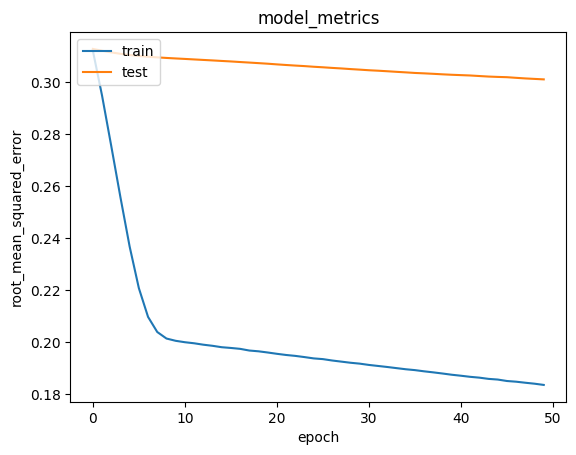

In [47]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model sudah cukup konvergen jika diteruskan pun hasilnya akan sama

### Top 10 Rekomendasi untuk user acak

In [48]:
book_df = books
df = df

# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
book_read_by_user = df[df.user_id == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
book_not_read = book_df[~book_df['isbn'].isin(book_read_by_user.isbn.values)]['isbn']
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)

book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

In [49]:
# Predict ratings untuk buku yang belum dibaca pengguna
ratings = model.predict(user_book_array).flatten()

# Ambil 10 indeks dengan rating tertinggi (pastikan 10 buku unik)
top_ratings_indices = ratings.argsort()[-10:][::-1]

# Kumpulkan ISBN rekomendasi, pastikan tidak ada duplikat
seen_isbns = set()
recommended_book_ids = []

for x in top_ratings_indices:
    book_id = book_encoded_to_book.get(book_not_read[x][0])
    # Tambahkan hanya ISBN yang belum ada di `seen_isbns`
    if book_id not in seen_isbns:
        seen_isbns.add(book_id)
        recommended_book_ids.append(book_id)
    # Hentikan loop jika sudah 10 ISBN unik
    if len(recommended_book_ids) == 10:
        break

# Tampilkan rekomendasi
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)

top_book_user = (
    book_read_by_user.sort_values(by='rating', ascending=False)
    .head(5)
    .isbn.values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.book_title, ':', row.Category)

print('----' * 8)
print('Top 10 Book Recommendation')
print('----' * 8)

# Ambil data buku rekomendasi dan pastikan tidak ada duplikat ISBN
recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)].drop_duplicates(subset='isbn')

# Tampilkan hanya 10 buku pertama (jika ada duplikasi di data sumber)
for row in recommended_book.head(10).itertuples():
    print(row.book_title, ':', row.Category)

596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for users: 99312
Book with high ratings from user
--------------------------------
Apollyon: The Destroyer Is Unleashed (Left Behind No. 5) : ['Fiction']
Apollyon: The Destroyer Is Unleashed (Left Behind No. 5) : ['Fiction']
Apollyon: The Destroyer Is Unleashed (Left Behind No. 5) : ['Fiction']
Magnificent Prayer : ['Religion']
Ideals Easter: More Than 50 Years of Celebrating Life's Most Treasured Moments (Ideals Easter) : ['Religion']
Martin Luther: The Great Reformer (Heroes of the Faith) : ['Biography & Autobiography']
Apollyon: The Destroyer Is Unleashed (Left Behind No. 5) : ['Fiction']
--------------------------------
Top 10 Book Recommendation
--------------------------------
Siddhartha : ['Fiction']
Harry Potter and the Order of the Phoenix (Book 5) : ['Juvenile Fiction']
Harry Potter and the Goblet of Fire (Book 4) : ['Juvenile Fiction']
The Da Vinci Code : ['Fiction']
Harry Potter and the Sorcerer's Stone (Harry